# DTW Example

Based on chatgpt prompt.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

In [2]:

def dtw(x, y):
    """
    Computes the Dynamic Time Warping (DTW) distance between two time series x and y.
    Returns the accumulated cost matrix and the warping path.
    """
    n, m = len(x), len(y)
    dtw_matrix = np.full((n+1, m+1), np.inf)
    dtw_matrix[0, 0] = 0

    # Populate the DTW matrix.
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(x[i-1] - y[j-1])
            last_min = min(
                dtw_matrix[i-1, j],    # Insertion
                dtw_matrix[i, j-1],    # Deletion
                dtw_matrix[i-1, j-1]   # Match
            )
            dtw_matrix[i, j] = cost + last_min

    dtw_matrix = dtw_matrix[1:, 1:]  # Remove the extra padding.

    # Backtrack to find the optimal warping path.
    i, j = n-1, m-1
    warping_path = [(i, j)]

    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            steps = [dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]]
            argmin = np.argmin(steps)
            if argmin == 0:
                i -= 1
            elif argmin == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
        warping_path.append((i, j))

    warping_path.reverse()
    return dtw_matrix, dtw_matrix[-1, -1], warping_path


In [3]:

# Create two artificial time series.
t = np.linspace(0, 2 * np.pi, 100)
x = np.sin(t)
y = np.sin(t + 1.0)  # Phase-shifted sine wave.


In [4]:

# Compute DTW.
dtw_matrix, distance, path = dtw(x, y)
print(f"DTW distance between the two time series: {distance:.4f}")


DTW distance between the two time series: 14.8877


In [5]:
# also calculate the l2 norm between the two
l2_norm = np.linalg.norm(x - y)
print(f"L2 norm between the two time series: {l2_norm:.4f}")


L2 norm between the two time series: 6.7984


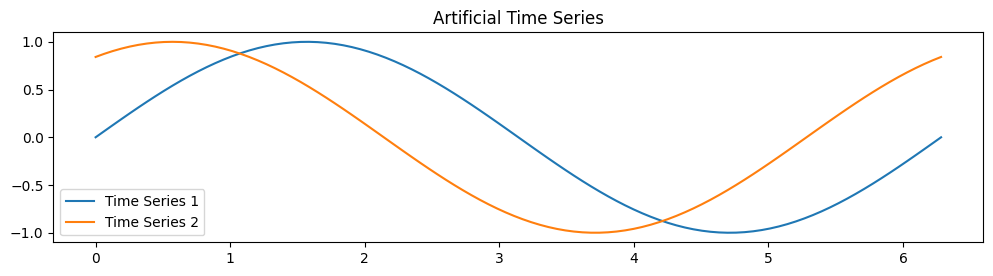

In [6]:

# Plot the time series.
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Time Series 1')
plt.plot(t, y, label='Time Series 2')
plt.title('Artificial Time Series')
plt.legend()


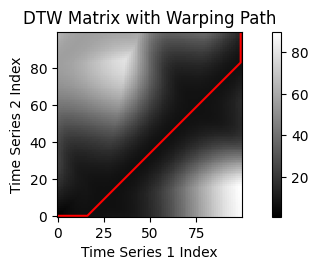

In [7]:

# Plot the DTW matrix and warping path.
plt.subplot(2, 1, 2)
plt.imshow(dtw_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
path_x, path_y = zip(*path)
plt.plot(path_x, path_y, 'r')  # Warping path.
plt.title('DTW Matrix with Warping Path')
plt.xlabel('Time Series 1 Index')
plt.ylabel('Time Series 2 Index')
plt.colorbar()

plt.tight_layout()
plt.show()

In [12]:
%matplotlib inline

# Create two artificial time series.
t = np.linspace(0, 2 * np.pi, 100)
x = np.sin(t)

def update_plot(shift):
    y = np.sin(t + shift)  # Phase-shifted sine wave.
    
    # Compute DTW.
    dtw_matrix, distance, path = dtw(x, y)
    l2_norm = np.linalg.norm(x - y)
    
    # Clear previous plots
    plt.clf()
    
    # Plot the time series.
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, x, label='Time Series 1')
    plt.plot(t, y, label='Time Series 2')
    plt.title(f'Artificial Time Series (Shift: {shift:.2f})')
    plt.legend()
    
    # Plot the DTW matrix and warping path.
    plt.subplot(2, 1, 2)
    plt.imshow(dtw_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
    path_x, path_y = zip(*path)
    plt.plot(path_x, path_y, 'r')  # Warping path.
    plt.title(f'DTW Matrix with Warping Path\nDTW Distance: {distance:.4f}, L2 Norm: {l2_norm:.4f}')
    plt.xlabel('Time Series 1 Index')
    plt.ylabel('Time Series 2 Index')
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

# Create an interactive slider
shift_slider = FloatSlider(value=1.0, min=0.0, max=3.2, step=0.1, description='Shift:')
interact(update_plot, shift=shift_slider)

interactive(children=(FloatSlider(value=1.0, description='Shift:', max=3.2), Output()), _dom_classes=('widget-…

<function __main__.update_plot(shift)>

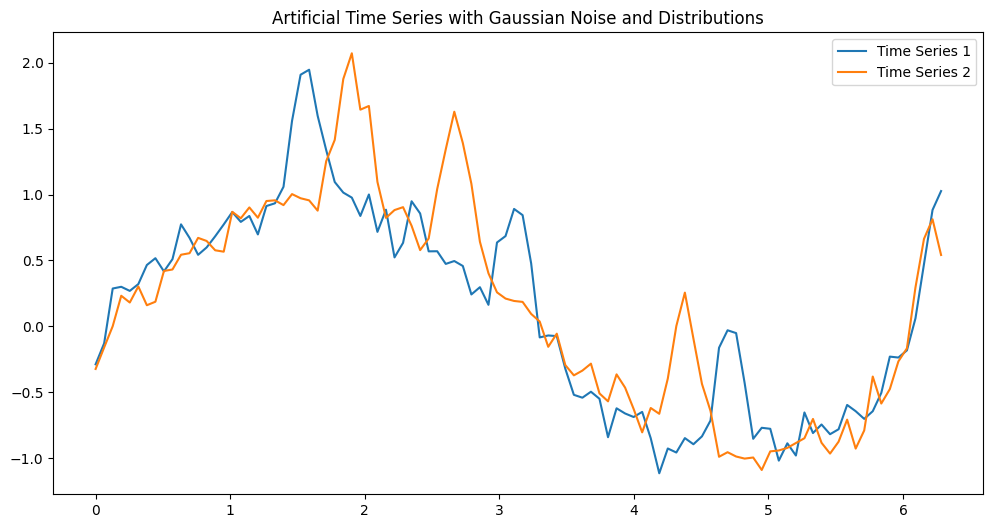

In [16]:
# Create two artificial time series with Gaussian noise and additional Gaussian distributions.
t = np.linspace(0, 2 * np.pi, 100)
x = np.sin(t) + np.random.normal(0, 0.1, t.shape)

# Add Gaussian distributions at different offsets
gaussian1 = np.exp(-0.5 * ((t - np.pi/2) / 0.1)**2)
gaussian2 = np.exp(-0.5 * ((t - np.pi) / 0.1)**2)
gaussian3 = np.exp(-0.5 * ((t - 3*np.pi/2) / 0.1)**2)
gaussian4 = np.exp(-0.5 * ((t - 2*np.pi) / 0.1)**2)

x += gaussian1 + gaussian2 + gaussian3 + gaussian4

# Create the second time series with a random offset between 0.1 and 0.5
offset = np.random.uniform(-0.5, 0.5)
y = np.sin(t + offset) + np.random.normal(0, 0.1, t.shape)
offset = np.random.uniform(-0.5, 0.5)
y += np.exp(-0.5 * ((t - np.pi/2 + offset) / 0.1)**2)
offset = np.random.uniform(-0.5, 0.5)
y += np.exp(-0.5 * ((t - np.pi + offset) / 0.1)**2)
offset = np.random.uniform(-0.5, 0.5)
y += np.exp(-0.5 * ((t - 3*np.pi/2 + offset) / 0.1)**2)
offset = np.random.uniform(-0.5, 0.5)
y += np.exp(-0.5 * ((t - 2*np.pi + offset) / 0.1)**2)

# Plot the new time series
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='Time Series 1')
plt.plot(t, y, label='Time Series 2')
plt.title('Artificial Time Series with Gaussian Noise and Distributions')
plt.legend()
plt.show()

In [17]:

# Compute DTW.
dtw_matrix, distance, path = dtw(x, y)
print(f"DTW distance between the two time series: {distance:.4f}")


DTW distance between the two time series: 13.5916


In [18]:
# also calculate the l2 norm between the two
l2_norm = np.linalg.norm(x - y)
print(f"L2 norm between the two time series: {l2_norm:.4f}")


L2 norm between the two time series: 4.4303
